# K-Means Clustering

## k-Means on a randomly generated dataset

### import required libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

### generating random points

Next we will be making <i> random clusters </i> of points by using the <b> make_blobs </b> class. The <b> make_blobs </b> class can take in many inputs, but we will be using these specific ones. <br> <br>
<b> <u> Input </u> </b>
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul> 
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>

In [3]:
from sklearn.datasets import make_blobs

x,y = make_blobs(n_samples=5000, centers=[[4,4],[-2,-1],[2,-3],[1,1]], cluster_std=0.9)

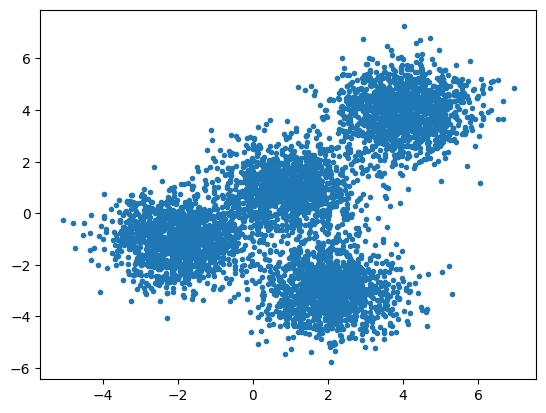

In [5]:
# plotting points
plt.scatter(x[:,0], x[:,1], marker=".")
plt.show()

### Setting up K-Means

The KMeans class has many parameters that can be used, but we will be using these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.

In [7]:
from sklearn.cluster import KMeans

k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)

k_means.fit(x)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",4
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",12
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",None
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [9]:
# Now let's grab the labels for each point in the model using KMeans' .labels_ attribute and save it as k_means_labels .
k_means_labels = k_means.labels_
k_means_labels

array([1, 3, 2, ..., 3, 1, 3], shape=(5000,), dtype=int32)

In [13]:
# We will also get the coordinates of the cluster centers using KMeans' .cluster_centers_ and save it as k_means_cluster_centers .
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 4.0236739 ,  3.95287135],
       [-2.0156736 , -1.03867099],
       [ 0.94992698,  0.98022855],
       [ 2.04129611, -2.97450713]])

<h2 id="creating_visual_plot">Creating the Visual Plot</h2>

So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!

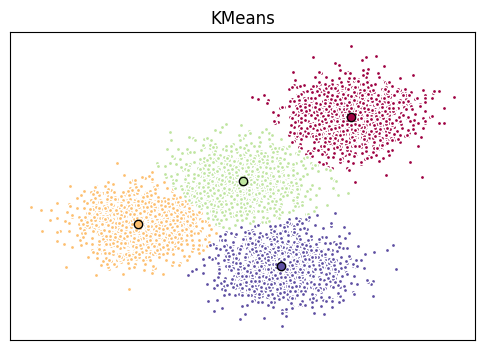

In [15]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(x[my_members, 0], x[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()